### Проверка работы API

In [38]:
import base64
from pathlib import Path

import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [18]:
def plot_search_results(query_path: Path, scores: list, image_paths: list[Path], n: int = 5):
    """
    Plot the top n search results with their scores using matplotlib.
    
    Parameters:
    -----------
    query_path : str
        Path to the query image.
    indexes : list or numpy.ndarray
        Indexes of the top search results.
    scores : list or numpy.ndarray
        Similarity scores for the top search results.
    image_paths : list
        List of all image paths in the dataset.
    n : int, optional
        Number of results to display (default is 5).
    """


    fig, axes = plt.subplots(1, n + 1, figsize=(18, 6))

    img = mpimg.imread(query_path)
    axes[0].imshow(img)
    axes[0].set_title(f"Query\n{query_path.stem}\n{query_path.parent.stem}", color='red')
    axes[0].axis('off')
    
    for i in range(n):
        img_path = image_paths[i]
        score = scores[i]
        
        img = mpimg.imread(img_path)
        axes[i + 1].imshow(img)
        axes[i + 1].set_title(f"Similarity score: {score:.3f}\n{img_path.name}\n{img_path.parent.stem}")
        axes[i + 1].axis('off')
    
    plt.tight_layout()
    plt.show()


In [29]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,image_path
0,flowers/tulip/14067778605_0285b7cc3a.jpg
1,flowers/daisy/530738000_4df7e4786b.jpg
2,flowers/tulip/7166591854_93c0dd6f8d_n.jpg
3,flowers/tulip/8713398906_28e59a225a_n.jpg
4,flowers/tulip/4561670472_0451888e32_n.jpg


In [53]:
img_path = test_df["image_path"].iloc[11]
api_url = "http://127.0.0.1:8100/api/predict"

frame = cv2.imread(img_path)
# Подготовка к отправке в формате base64
_, img_encoded = cv2.imencode(".jpg", frame)
img_base64 = base64.b64encode(img_encoded).decode("utf-8")


payload = {
    "image": img_base64,
}
response = requests.post(api_url, json=payload)

# Обработка результата
if response.status_code == 200:
    result = response.json()
    print("API response:", result)
else:
    print("Ошибка при вызове API:", response.status_code, response.text)

API response: {'result': {'flowers/dandelion/3512879565_88dd8fc269_n.jpg': 0.8917520046234131, 'flowers/dandelion/5628515159_6b437ff1e5_n.jpg': 0.871073842048645, 'flowers/dandelion/510677438_73e4b91c95_m.jpg': 0.8648437261581421, 'flowers/dandelion/13967344688_aa629dcdee_n.jpg': 0.8576900959014893, 'flowers/dandelion/138166590_47c6cb9dd0.jpg': 0.8544636964797974}}


In [59]:
image_names = [Path(name) for name in result["result"].keys()]
scores = list(result["result"].values())

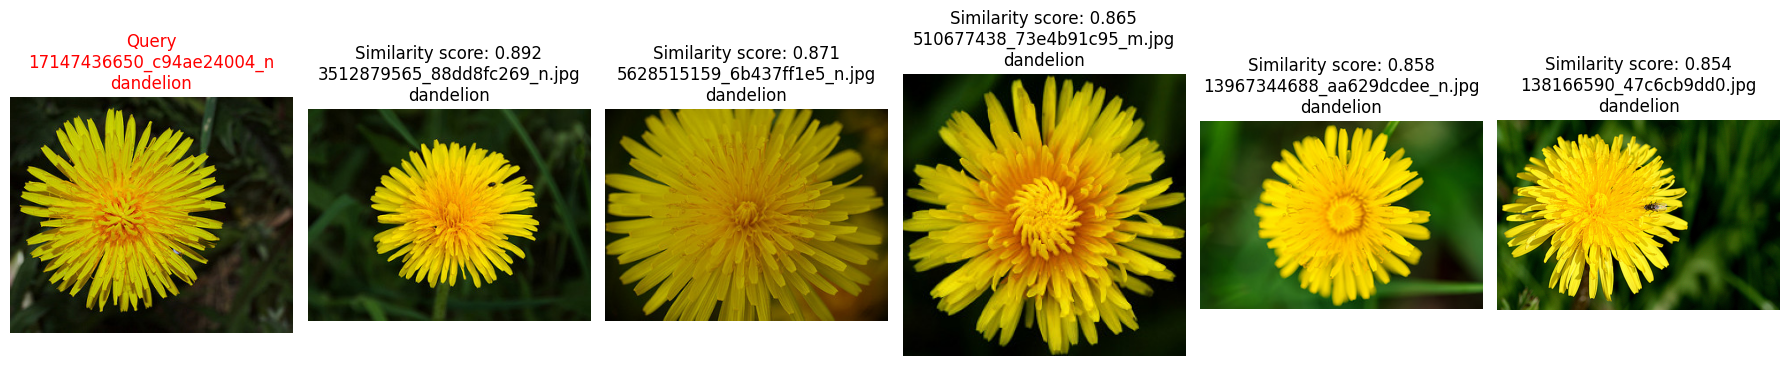

In [61]:
plot_search_results(Path(img_path), scores, image_names)